In [ ]:
# Regular ML: XGBoost

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

df = pd.read_parquet("../../datasets/amazon_user_reviews_features_sentiment.parquet")

feature_cols = [
    "exclamation_count", "question_count", "word_count", "char_count",
    "all_caps_words", "uppercase_ratio", "total_punctuation", "avg_word_length",
    "helpful_vote", "int_verified_purchase", "hour", "month", "season"
]
X = df[feature_cols]
y = df["sentiment"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# standarization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print("Dataset is standardized.")
# PCA
pca = PCA(n_components="mle")
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
print(f"PCA complete. Components: {pca.n_components_}")

model = xgb.XGBClassifier(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric="mlogloss",
    use_label_encoder=False,
    random_state=42
)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_score = model.predict_proba(X_test)

Dataset is standardized.
PCA complete. Components: 12


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:200: UserWarning: [05:43:50] WARNING: /__w/xgboost/xgboost/src/learner.cc:782: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


MODEL EVALUATION METRICS
Accuracy:  0.4405
Precision: 0.4410
Recall:    0.4405
F1-Score:  0.4406

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.47      0.46      0.47      1236
           1       0.43      0.45      0.44      1217
           2       0.42      0.41      0.42      1227

    accuracy                           0.44      3680
   macro avg       0.44      0.44      0.44      3680
weighted avg       0.44      0.44      0.44      3680

ROC=AUC REPORT
AUC score: 0.6230918757541472


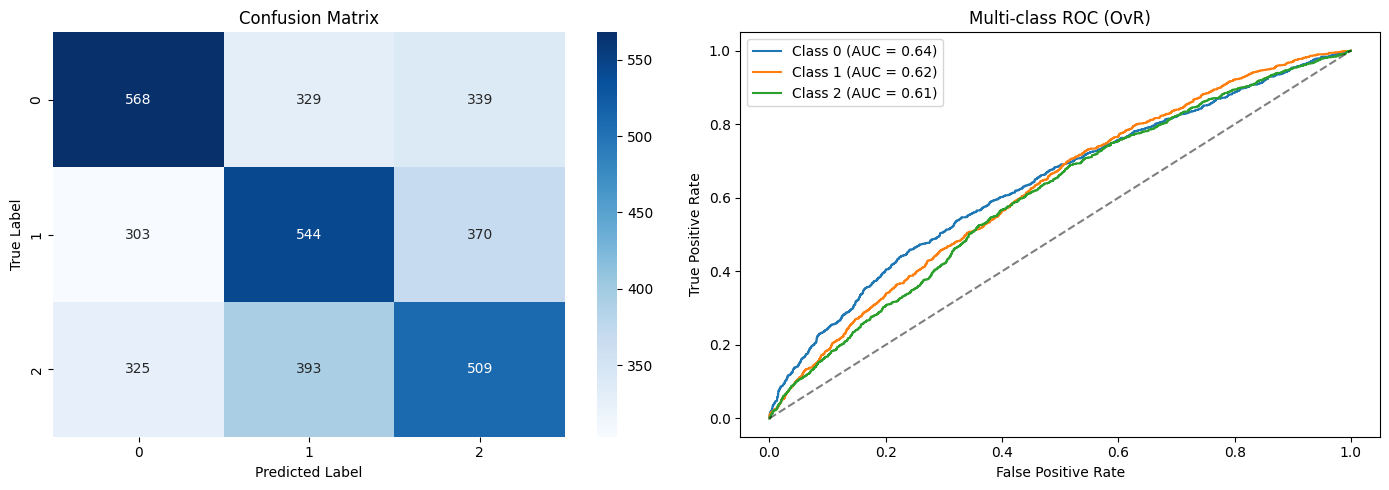

In [ ]:
import sys
import os
sys.path.insert(0, os.path.abspath('../../'))

# ModelEvaluation
from ModelEvaluation.ModelEvaluation import ModelEvaluation
# Model Evaluation
evaluator = ModelEvaluation()
evaluator.run_pipeline(y_test, y_pred, y_score)